K Nearest Neighbours:

Phishing Site Detection:

In this dataset, we have collected the information about different websites inorder to classify them as phishing or legitimate websites.


** Column Description **

 	having_IP_Address's type is nominal, range is ('-1', '1')
 	URL_Length's type is nominal, range is ('1', '0', '-1')
 	Shortining_Service's type is nominal, range is ('1', '-1')
 	having_At_Symbol's type is nominal, range is ('1', '-1')
 	double_slash_redirecting's type is nominal, range is ('-1', '1')
 	Prefix_Suffix's type is nominal, range is ('-1', '1')
 	having_Sub_Domain's type is nominal, range is ('-1', '0', '1')
 	SSLfinal_State's type is nominal, range is ('-1', '1', '0')
 	Domain_registeration_length's type is nominal, range is ('-1', '1')
 	Favicon's type is nominal, range is ('1', '-1')
 	port's type is nominal, range is ('1', '-1')
 	HTTPS_token's type is nominal, range is ('-1', '1')
 	Request_URL's type is nominal, range is ('1', '-1')
 	URL_of_Anchor's type is nominal, range is ('-1', '0', '1')
 	Links_in_tags's type is nominal, range is ('1', '-1', '0')
 	SFH's type is nominal, range is ('-1', '1', '0')
 	Submitting_to_email's type is nominal, range is ('-1', '1')
 	Abnormal_URL's type is nominal, range is ('-1', '1')
 	Redirect's type is nominal, range is ('0', '1')
 	on_mouseover's type is nominal, range is ('1', '-1')
 	RightClick's type is nominal, range is ('1', '-1')
 	popUpWidnow's type is nominal, range is ('1', '-1')
 	Iframe's type is nominal, range is ('1', '-1')
 	age_of_domain's type is nominal, range is ('-1', '1')
 	DNSRecord's type is nominal, range is ('-1', '1')
 	web_traffic's type is nominal, range is ('-1', '0', '1')
 	Page_Rank's type is nominal, range is ('-1', '1')
 	Google_Index's type is nominal, range is ('1', '-1')
 	Links_pointing_to_page's type is nominal, range is ('1', '0', '-1')
 	Statistical_report's type is nominal, range is ('-1', '1')
 	Result's type is nominal, range is ('-1', '1'))
    
    The  data coding is as follows:
    "1"  - Legitimate Website
    "0"  - Suspisious
    "-1" - Malicious Website
    
** Objective**

To predict the value of Result column and say whether the website is Malicious or Legitimate website.

Importing the Packages and Dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Loading the dataset:

In [2]:
url = 'C://Users/Nikhil Jain/Desktop/Code/KNN/UPX/PhishingData.csv'
phishing_data = pd.read_csv(url)
phishing_data.head(5)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [4]:
phishing_data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Names of all the columns

phishing_data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [6]:
#Extracting the lables

labels = phishing_data['Result'].values
print(labels)

[-1 -1 -1 ... -1 -1 -1]


In [8]:
#Getting value counts

valuecount = phishing_data['Result'].value_counts()
print(valuecount)

 1    6157
-1    4898
Name: Result, dtype: int64


There are 6157 legitimate websites and 4898 Malicious websites. The above concludes that the data is not much imbalanced.

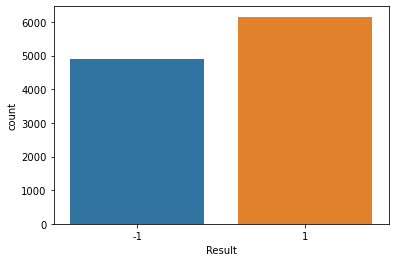

In [9]:
#Let's look at the countplot

sns.countplot('Result', data = phishing_data)

No need to do normalisation as all the values are in same scale. They are all binary values. 

In [11]:
#Extracting the features

print(phishing_data.columns[:-1])
features = phishing_data.columns[:-1]
predictors = phishing_data[features].values
predictors

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')


array([[-1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  0, -1],
       ...,
       [ 1, -1,  1, ...,  1,  0,  1],
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1,  1, ..., -1,  1, -1]], dtype=int64)

In [12]:
corr = phishing_data.corr()

In [13]:
corr

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.087025,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URL_Length,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,-0.042497,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.006101,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,0.304899,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.035100,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.007504,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,-0.016704,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,-0.014757,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.054253,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
Favicon,0.087025,-0.042497,0.006101,0.304899,0.035100,-0.007504,-0.016704,-0.014757,0.054253,1.000000,...,0.939633,0.627607,-0.002628,0.088211,-0.050922,0.011699,-0.016668,-0.127243,0.300917,-0.000280


Correralation works mostly with continuous values.But still, looking at above we can conclude that not much is correlated.

There is some correlation between double_slash_redirecting and shortining_service.
There are some correlation between some values. But they won't be much useful as most of the features are categorical.

Since a lot of variables are categorical we havent performed any EDA on this.

Splitting the data into training and test

In [14]:
X = predictors
y = labels

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Building the KNN model

In [16]:
#Fitting the KNN Classifier in training data.
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 11)
clf_knn = clf_knn.fit(X_train, y_train)

Predicting from KNN model

In [17]:
y_pred = clf_knn.predict(X_test)

Evaluating the model:
    
Cross Validation is used to see how well a model performs in an independent dataset. Different samples are used for training and testing and the average accuracy score is calculated.

In [18]:
# Computing the cross validation score with 5-fold cross validation.

from sklearn.model_selection import cross_val_score
score_knn = cross_val_score(clf_knn, X_test, y_test, cv=5)
print('Cross Validation Score: ' + str(score_knn))
print('Cross Validation Mean Score: ' + str(score_knn.mean()))

Cross Validation Score: [0.92599278 0.92224231 0.90596745 0.92210145 0.9057971 ]
Cross Validation Mean Score: 0.9164202190853313


Classification report

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

          -1       0.92      0.93      0.93      1183
           1       0.94      0.94      0.94      1581

   micro avg       0.94      0.94      0.94      2764
   macro avg       0.93      0.93      0.93      2764
weighted avg       0.94      0.94      0.94      2764



Confusion Matrix

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1095,   88],
       [  89, 1492]], dtype=int64)

Accuracy

In [21]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9359623733719248

Appendix:

1- Use different counts of neighbours by setting value of k(5,7,9,11,13,15).

2- Perform cv(5) on each value of k.

3- Compare the CV Score to deduce the best model.

4- Use the best value of K.

In [22]:
list_k = [5,7,9,11,13,15]

for k in list_k:
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    score_knn = cross_val_score(clf_knn, X_test, y_test, cv=5)
    print("K: ", k)
    print("Cross Validation score : " + str(score_knn))
    print("Cross Validation Mean score : " + str(score_knn.mean()))
    print("")

K:  5
Cross Validation score : [0.92418773 0.91139241 0.90235081 0.9076087  0.91666667]
Cross Validation Mean score : 0.912441261351424

K:  7
Cross Validation score : [0.92057762 0.91862568 0.9005425  0.93115942 0.90217391]
Cross Validation Mean score : 0.9146158248520813

K:  9
Cross Validation score : [0.92238267 0.920434   0.90777577 0.92028986 0.90398551]
Cross Validation Mean score : 0.9149735597435221

K:  11
Cross Validation score : [0.92599278 0.92224231 0.90596745 0.92210145 0.9057971 ]
Cross Validation Mean score : 0.9164202190853313

K:  13
Cross Validation score : [0.91155235 0.92224231 0.90415913 0.91485507 0.90217391]
Cross Validation Mean score : 0.9109965557464509

K:  15
Cross Validation score : [0.9133574  0.92766727 0.90958409 0.91666667 0.89855072]
Cross Validation Mean score : 0.9131652296530135



Using the value of k=11, we have obtained the highest cross-validation accuracy of 0.916